In [14]:
import pandas as pd
dataset_path = r"C:\Users\Hp\Desktop\python\k-means\data-Clustering Hiérarchique.csv"
data = pd.read_csv(dataset_path, encoding='utf-8')
data.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  28729 non-null  object 
 1   day                      28729 non-null  int64  
 2   month                    28729 non-null  int64  
 3   year                     28729 non-null  int64  
 4   cases                    28636 non-null  float64
 5   deaths                   28437 non-null  float64
 6   countriesAndTerritories  28729 non-null  object 
 7   geoId                    28729 non-null  object 
 8   countryterritoryCode     28729 non-null  object 
 9   popData2020              28729 non-null  int64  
 10  continentExp             28729 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.4+ MB
None


In [16]:
print(data.isnull().sum())

dateRep                      0
day                          0
month                        0
year                         0
cases                       93
deaths                     292
countriesAndTerritories      0
geoId                        0
countryterritoryCode         0
popData2020                  0
continentExp                 0
dtype: int64


In [17]:
print(data.describe())

                day         month          year          cases        deaths  \
count  28729.000000  28729.000000  28729.000000   28636.000000  28437.000000   
mean      15.681855      6.431446   2020.967559    6088.425129     40.866160   
std        8.778566      3.223586      0.789220   21455.994469    128.729388   
min        1.000000      1.000000   2020.000000 -348846.000000   -217.000000   
25%        8.000000      4.000000   2020.000000     111.000000      0.000000   
50%       16.000000      6.000000   2021.000000     705.000000      5.000000   
75%       23.000000      9.000000   2022.000000    3483.250000     31.000000   
max       31.000000     12.000000   2022.000000  501635.000000  13743.000000   

        popData2020  
count  2.872900e+04  
mean   1.534803e+07  
std    2.142396e+07  
min    3.874700e+04  
25%    2.095861e+06  
50%    6.951482e+06  
75%    1.152244e+07  
max    8.316671e+07  


In [18]:
data.dropna(inplace=True)

In [30]:
aggregated_data = data.groupby('geoId').agg({
    'cases': 'sum',
    'deaths': 'sum',
    'popData2020': 'mean'  # La population est identique pour un pays
}).reset_index()

# Ajouter des colonnes de taux par habitant
aggregated_data['cases_per_million'] = (aggregated_data['cases'] / aggregated_data['popData2020']) * 1e6
aggregated_data['deaths_per_million'] = (aggregated_data['deaths'] / aggregated_data['popData2020']) * 1e6


In [27]:
aggregated_data

,geoId,cases,deaths,popData2020,cases_per_million,deaths_per_million
0,AT,5402162.0,20899.0,8901064.0,606911.937719,2347.921552
1,BE,4597870.0,32883.0,11522440.0,399036.141651,2853.822628
2,BG,1271735.0,37790.0,6951482.0,182944.442638,5436.250860
3,CY,596297.0,1191.0,888005.0,671501.849652,1341.208664
4,CZ,4152997.0,41524.0,10693939.0,388350.541367,3882.947154
5,DE,35287690.0,152753.0,83166711.0,424300.655583,1836.708440
6,DK,3219571.0,7124.0,5822763.0,552928.394990,1223.474148
7,EE,592700.0,2729.0,1328976.0,445982.470714,2053.460710
8,EL,5135200.0,33574.0,10718565.0,479093.983196,3132.322284
9,ES,13564823.0,111649.0,47332614.0,286585.122892,2358.817538


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(aggregated_data[['deaths_per_million', 'cases_per_million']])


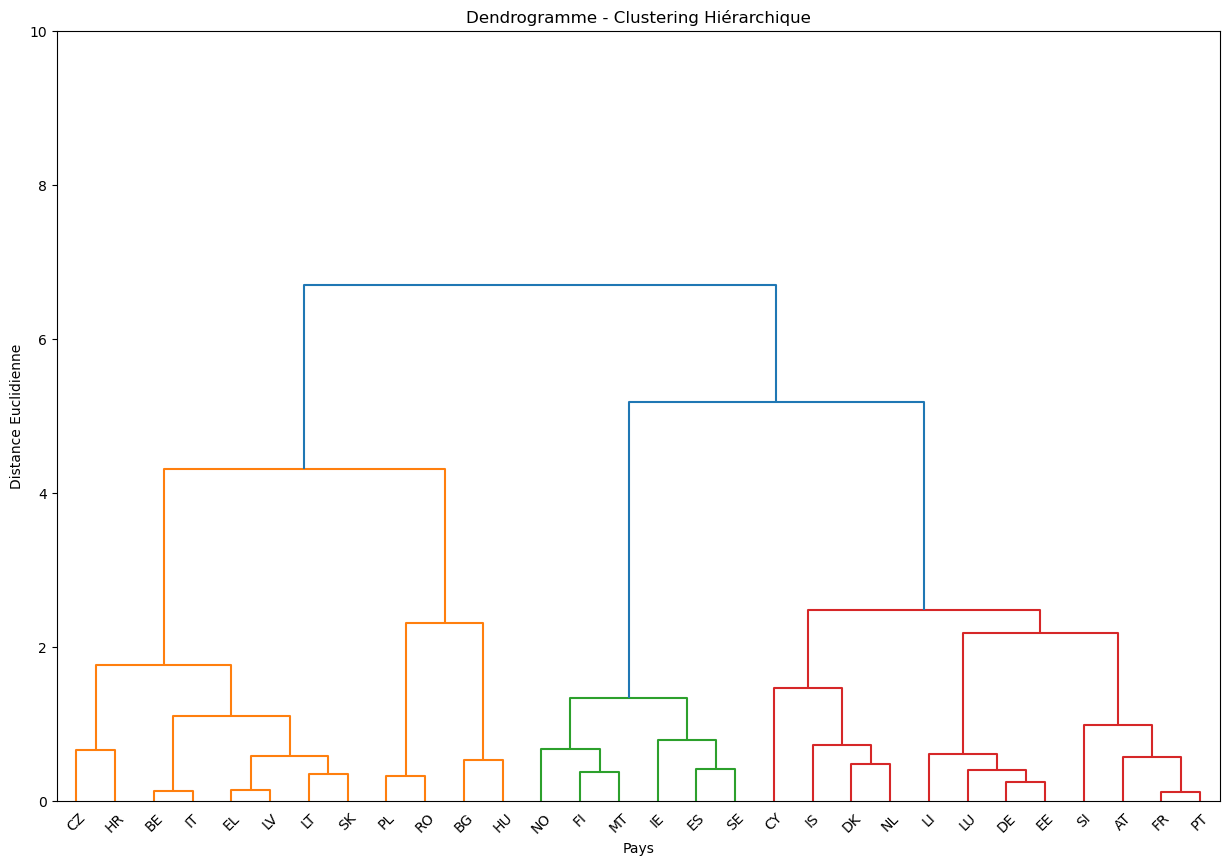

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Calcul des liens pour le clustering hiérarchique
linkage_matrix = linkage(data_scaled, method='ward')

# Tracé du dendrogramme
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=aggregated_data['geoId'].values)
plt.title('Dendrogramme - Clustering Hiérarchique')
plt.xlabel('Pays')
plt.ylim(0,10)
plt.ylabel('Distance Euclidienne')
plt.show()

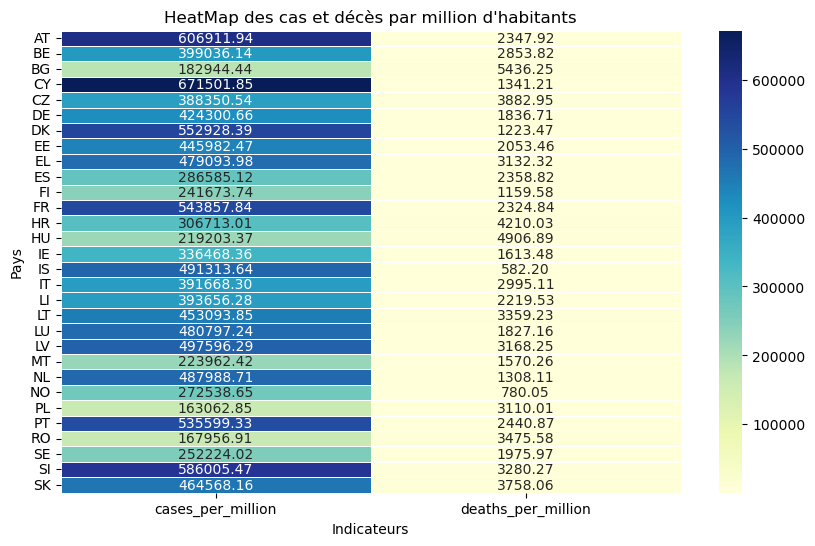

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Préparer les données pour la HeatMap
heatmap_data = aggregated_data[['geoId', 'cases_per_million', 'deaths_per_million']]
heatmap_data.set_index('geoId', inplace=True)

# Créer une HeatMap avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("HeatMap des cas et décès par million d'habitants")
plt.ylabel("Pays")
plt.xlabel("Indicateurs")
plt.show()
